# Proyecto final

## Abstract

Conjunto referente a los datos de Turismo Receptivo, obtenidos a través de la encuesta de Turismo Receptivo, este conjunto contiene la información desagregada de visitantes y el gasto de los mismos referente a cada trimestre desde el año 2016 en adelante. La información que se encuentra detallada es sobre; destino principal del viaje, rubro del gasto, nacionalidad de los visitantes, principal alojamiento utilizado, principal motivo del viaje.

El análisis de los datos del turismo receptivo en Uruguay ayudará a identificar patrones claves para diseñar estrategias de publicidad y promoción del turismo uruguayo en el exterior. Se pondrá especial atención en el comportamiento de los visitantes, influido por factores como la nacionalidad, destino interno, modalidad de viaje, puerto de ingreso, entre otros. Estos factores contribuirán a revelar oportunidades de mejora, permitiendo la personalización de campañas con un objetivo claro: el incremento anual de turistas extranjeros.

El conjunto de datos se obtuvo de la siguiente fuente: https://catalogodatos.gub.uy/dataset/ministerio-de-turismo-turismo-receptivo/resource/15ceb9bd-973f-4f88-96a5-5ad769b46ec2. El Catálogo Nacional de Datos Abiertos es una herramienta que permite acceder a datos abiertos de organismos públicos, academia, organizaciones de sociedad civil y empresas privadas del Uruguay. Cualquier persona puede utilizar los datos publicados libremente para contar historias, desarrollar investigaciones, visualizaciones, aplicaciones cívicas y emprendimientos.

##Recomendaciones obtenidas por los insights observados

*    **Marketing dirigido**

Focalizar las campañas de marketing en países vecinos como Argentina, Brasil, Paraguay y Chile, donde ya existe una fuerte afluencia de turistas.
Crear campañas específicas para turistas paraguayos, destacando las opciones de lujo y servicios premium para aprovechar su alto gasto promedio.
*   **Promoción de actividades recreativas:**

Continuar desarrollando y promocionando actividades recreativas y de ocio que atraigan a una amplia variedad de turistas, reforzando la imagen de Uruguay como un destino de vacaciones.
Mejorar y diversificar las ofertas durante las temporadas bajas para incentivar visitas en esos periodos.
*   **Preparación para temporadas altas:**

Asegurar que las infraestructuras turísticas estén bien preparadas para las temporadas altas, ofreciendo servicios y promociones especiales durante los meses de verano, navidades, fin de año, carnaval y semana santa.
Realizar campañas de promoción específicas antes de estas temporadas para atraer más turistas y maximizar los ingresos.

## Definición del objetivo

Desarrollar un modelo de machine learning que permita predecir la variable objetivo que sería *GastoTotal*, utilizando las variables disponibles en el dataset. Esto ayudará a entender mejor los factores que influyen en el gasto de los turistas y permitirá diseñar estrategias para maximizar el ingreso turístico.

## Contexto comercial

El turismo es una industria clave para la economía de Uruguay, y maximizar el gasto de los turistas es esencial para el crecimiento económico del país. Comprender los factores que afectan el gasto total de los turistas permitirá a los operadores turísticos, agencias de viajes y el gobierno tomar decisiones informadas para mejorar la oferta turística y optimizar los ingresos.

## Problema Comercial

El principal desafío es identificar los factores más influyentes que afectan el gasto total de los turistas y utilizar esta información para predecir dicho gasto. Esto permitirá ajustar las estrategias de marketing, mejorar la infraestructura turística y diseñar ofertas personalizadas que maximicen el gasto de los visitantes.

## Contexto analítico

El análisis de datos turísticos proporciona información valiosa sobre las tendencias y comportamientos de los turistas. A través de la exploración de datos y la visualización de patrones, podemos identificar oportunidades para mejorar las estrategias de marketing, ajustar ofertas y servicios, y planificar de manera eficiente las temporadas altas y bajas.

## Análisis exploratorio de datos (EDA)


  



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Carga del dataset
url = 'https://raw.githubusercontent.com/randres6/Coderhouse/main/Sheet_turismoreceptivo__.csv'
data = pd.read_csv(url)

data.head()

,Lugar Ingreso,Transporte Internacional de Ingreso,FechaIngreso,FechaEgreso,Pais,Residencia,Motivo,Ocupacion,Estudio,Localidad,...,GastoTotal,GastoAlojamiento,GastoAlimentacion,GastoTransporte,GastoCultural,GastoTours,GastoCompras,GastoOtros,Coef,CoefTot
0,Paysandu,Terrestre Bus,04/01/2018,12/01/2018,Argentina,Rosario,Ocio y vacaciones,"Deportista, Entrenador, Juez Dep",Secundaria completa,Punta del Este,...,3989.02,800.00,909.90,317.97,1049.58,0.0,887.58,24.00,190.22,570.65
1,Colonia,Maritimo - Fluvial,02/01/2018,10/01/2018,Argentina,Buenos Aires,Ocio y vacaciones,"Prof, Tecnico, Docente, Artista",Terciaria completa,Punta del Este,...,4071.89,1820.29,966.09,317.97,0.00,0.0,389.79,577.74,162.20,486.61
2,Chuy,Terrestre Bus,12/01/2018,21/01/2018,Brasil,Santa Catarina,Ocio y vacaciones,"Empl. Adm, Cajero, Vendedor",Secundaria completa,Punta del Este,...,2512.80,721.09,405.00,357.72,30.00,0.0,999.00,0.00,117.69,353.07
3,Aeropuerto de Carrasco,Aereo,06/01/2018,28/01/2018,Uruguay,Otras ciudades Sudamerica,Ocio y vacaciones,"Prof, Tecnico, Docente, Artista",Terciaria completa,La Paloma,...,2439.43,0.00,1406.43,215.25,455.77,0.0,361.98,0.00,98.14,294.42
4,Colonia,Terrestre Auto,06/01/2018,16/01/2018,Argentina,Buenos Aires,Ocio y vacaciones,Estudiante,Terciaria incompleta,Punta del Este,...,1420.95,587.34,379.12,158.63,0.00,0.0,295.86,0.00,162.20,162.20


## Detección de valores nulos

Usando isnull sobre el dataset para mostrar el número de valores nulos en cada columna.

In [38]:
valores_nulos = data.isnull().sum()
print(f"Valores nulos por columna:\n{valores_nulos}")

Valores nulos por columna:
Lugar Ingreso                          0
Transporte Internacional de Ingreso    0
FechaIngreso                           0
FechaEgreso                            0
Pais                                   0
Residencia                             0
Motivo                                 0
Ocupacion                              0
Estudio                                0
Localidad                              0
Departamento                           0
Alojamiento                            0
TransporteLocal                        0
Lugar Egreso                           0
Transporte Internacional de Egreso     0
Destino                                0
Estadia                                0
Gente                                  0
GastoTotal                             0
GastoAlojamiento                       0
GastoAlimentacion                      0
GastoTransporte                        0
GastoCultural                          0
GastoTours                    

## Detección de valores duplicados

Usando duplicated() para indicar cuántas filas duplicadas existen en el dataset.

In [39]:
duplicados = data.duplicated().sum()
print(f"Dimensiones del dataset original: {data.shape}")
print(f"Número de filas duplicadas: {duplicados}")

Dimensiones del dataset original: (30214, 28)
Número de filas duplicadas: 103


## Eliminar filas dupliacadas

Verificando en el dataset que existen filas duplicadas que efectivamente distorsionan el analisis, se procede a utilizar drop_duplicates() para modificar el dataset original y eliminar todas las filas duplicadas.

In [40]:
data = data.drop_duplicates()

# Verifica que se han eliminado los duplicados
print(f"Dimensiones del dataset modificado: {data.shape}")

Dimensiones del dataset modificado: (30111, 28)


# Incorporar columnas al dataset

Se calculan y añaden las columnas de AñoIngreso y Trimestre, puesto que servirá como dato para futuras visualizaciones.

In [41]:
# Formato de fecha de la columna FechaIngreso
data['FechaIngreso'] = pd.to_datetime(data['FechaIngreso'], format='%d/%m/%Y', errors='coerce')

# Extraer el año y el trimestre
data['AñoIngreso'] = data['FechaIngreso'].dt.year.astype(int)
data['Trimestre'] = data['FechaIngreso'].dt.quarter.astype(int)


data.head()

,Lugar Ingreso,Transporte Internacional de Ingreso,FechaIngreso,FechaEgreso,Pais,Residencia,Motivo,Ocupacion,Estudio,Localidad,...,GastoAlimentacion,GastoTransporte,GastoCultural,GastoTours,GastoCompras,GastoOtros,Coef,CoefTot,AñoIngreso,Trimestre
0,Paysandu,Terrestre Bus,2018-01-04,12/01/2018,Argentina,Rosario,Ocio y vacaciones,"Deportista, Entrenador, Juez Dep",Secundaria completa,Punta del Este,...,909.90,317.97,1049.58,0.0,887.58,24.00,190.22,570.65,2018,1
1,Colonia,Maritimo - Fluvial,2018-01-02,10/01/2018,Argentina,Buenos Aires,Ocio y vacaciones,"Prof, Tecnico, Docente, Artista",Terciaria completa,Punta del Este,...,966.09,317.97,0.00,0.0,389.79,577.74,162.20,486.61,2018,1
2,Chuy,Terrestre Bus,2018-01-12,21/01/2018,Brasil,Santa Catarina,Ocio y vacaciones,"Empl. Adm, Cajero, Vendedor",Secundaria completa,Punta del Este,...,405.00,357.72,30.00,0.0,999.00,0.00,117.69,353.07,2018,1
3,Aeropuerto de Carrasco,Aereo,2018-01-06,28/01/2018,Uruguay,Otras ciudades Sudamerica,Ocio y vacaciones,"Prof, Tecnico, Docente, Artista",Terciaria completa,La Paloma,...,1406.43,215.25,455.77,0.0,361.98,0.00,98.14,294.42,2018,1
4,Colonia,Terrestre Auto,2018-01-06,16/01/2018,Argentina,Buenos Aires,Ocio y vacaciones,Estudiante,Terciaria incompleta,Punta del Este,...,379.12,158.63,0.00,0.0,295.86,0.00,162.20,162.20,2018,1


Verificar el tipo de dato de las columnas

In [42]:
print(data.dtypes)

Lugar Ingreso                                  object
Transporte Internacional de Ingreso            object
FechaIngreso                           datetime64[ns]
FechaEgreso                                    object
Pais                                           object
Residencia                                     object
Motivo                                         object
Ocupacion                                      object
Estudio                                        object
Localidad                                      object
Departamento                                   object
Alojamiento                                    object
TransporteLocal                                object
Lugar Egreso                                   object
Transporte Internacional de Egreso             object
Destino                                        object
Estadia                                         int64
Gente                                           int64
GastoTotal                  

### Conversión de columnas y escalado

Para que el algoritmo de machine learning pueda entrenarse de manera efectiva es peciso convertir las columnas categóricas a númericas, al mismo tiempo también es necesario escalar las variables que originalmente son númericas, puesto que representan unidades distintas, esto facilita que el algoritmo entienda mejor el conjunto de datos. La escalación de las variables categóricas que han sido convertidas en numéricas no es necesaria y puede afectar negativamente el rendimiento del modelo. Se seleccionan los años 2018 y 2019 del dataset puesto que los años posteriores son atípicos, debido a la pandemmia, observamos en el tratamiento de datos que el turismo se vio gravemente afectado.


In [44]:
data_filtered = data[(data['AñoIngreso'] == 2018) | (data['AñoIngreso'] == 2019)].copy()

# Selecciona las columnas categóricas que vas a convertir
categorical_columns = ['Motivo', 'Destino', 'Residencia', 'Pais', 'Alojamiento']

# Label Encoding a las columnas categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_filtered[col] = le.fit_transform(data_filtered[col])
    label_encoders[col] = le

# Verifica las nuevas columnas
print(data_filtered[categorical_columns].head())

# Selecciona solo las columnas que se van a usar para el modelo
features = ['Estadia', 'Gente'] + categorical_columns
X = data_filtered[features]
y = data_filtered['GastoTotal']

# Escala las columnas numéricas
numerical_columns = ['Estadia', 'Gente']  # Agrega cualquier otra columna numérica si es necesario
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])




   Motivo  Destino  Residencia  Pais  Alojamiento
0       2        7          19     2           17
1       2        7           0     2            8
2       2        7          21     4           11
3       2        2          11    26           19
4       2        7           0     2           17


<ipython-input-44-8c4f1d71b2dd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


###Preparar los Conjuntos de Datos

Se define X como todas las columnas excepto GastoTotal, que será la variable objetivo (y). Se procede a dividir el dataset en conjuntos de entrenamiento, validación y prueba (70%, 20% y 10% respectivamente), usando train_test_split.



In [45]:
# Divide los datos en 70% para entrenamiento, 20% para validación y 10% para prueba
X_train_plus_val, X_test, y_train_plus_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_plus_val, y_train_plus_val, test_size=0.2222, random_state=42)

print(f'Tamaño del conjunto: {X.shape}')


Tamaño del conjunto: (21436, 7)


###Feature Selection


Para reducir la dimensionalidad de los datos se elige un metodo de feature selection basado en la Importancia (SelectFromModel). Este método usa la importancia de las características determinada por el modelo.


In [46]:
# Selecciona características importantes
selector = SelectFromModel(model, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Verifica las dimensiones de los conjuntos resultantes
print(f'Tamaño del conjunto original: {X.shape}')
print(f'Tamaño del conjunto de entrenamiento original: {X_train.shape}')
print(f'Tamaño del conjunto de entrenamiento después de selección: {X_train_selected.shape}')
print(f'Tamaño del conjunto de validación original: {X_val.shape}')
print(f'Tamaño del conjunto de validación después de selección: {X_val_selected.shape}')
print(f'Tamaño del conjunto de prueba original: {X_test.shape}')
print(f'Tamaño del conjunto de prueba después de selección: {X_test_selected.shape}')


Tamaño del conjunto original: (21436, 7)
Tamaño del conjunto de entrenamiento original: (15005, 7)
Tamaño del conjunto de entrenamiento después de selección: (15005, 3)
Tamaño del conjunto de validación original: (4287, 7)
Tamaño del conjunto de validación después de selección: (4287, 3)
Tamaño del conjunto de prueba original: (2144, 7)
Tamaño del conjunto de prueba después de selección: (2144, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


###Crear y entrenar el modelo de Random Forest

Se decide emplear el algoritmo de machine learning supervisado Random Forest, es una técnica que es potente y versátil, y se usa ampliamente tanto en clasificación como en regresión debido a su capacidad para manejar complejidades en los datos y su robustez en la predicción. La amplia variedad de casos que contiene el conjunto de datos hace que el modelo no sea lineal, por ende, se entiende que la elección de este modelo es la correcta.

In [47]:
# Crea y entrena un modelo de Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

###Calculo de métricas

Se calculan métricas como el error cuadrático medio (RMSE) y el coeficiente de determinación (R²) para valorar la precisión del modelo.

In [48]:
# Evalua el modelo en el conjunto de validación
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f'RMSE en conjunto de validación: {rmse}')
print(f'R² en conjunto de validación: {r2}')

RMSE en conjunto de validación: 725.1042195899516
R² en conjunto de validación: 0.8362403882636784


Este fragmento de código muestra cómo realizar una validación cruzada y una búsqueda en cuadrícula (GridSearchCV) para optimizar el modelo de Random Forest.

In [49]:
# Validación Cruzada para evaluar el rendimiento del modelo
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validated R² en conjunto de entrenamiento: {np.mean(cv_scores)} +/- {np.std(cv_scores)}')

# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Usando neg_mean_squared_error para regresión
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print(f'Mejores hiperparametros: {grid_search.best_params_}')

# Evaluación del mejor modelo en conjunto de validación
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)
mse_best = mean_squared_error(y_val, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_val, y_pred_best)

print(f'mejor RMSE en conjunto de validación: {rmse_best}')
print(f'mejor R² en conjunto de validación: {r2_best}')

Cross-validated R² en conjunto de entrenamiento: 0.8049157933850687 +/- 0.031584788539319925
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parametros: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
mejor RMSE en conjunto de validación: 718.5410239483034
mejor R² en conjunto de validación: 0.8391914736107258


Se crea una instancia del modelo de Random Forest con los mejores hiperparámetros encontrados previamente (200 estimadores, 20 de  profundidad máxima y un mínimo de 10 muestras por división). El modelo se entrena utilizando los datos de entrenamiento disponibles.

In [50]:
# Crea y entrena un modelo de Random Forest (usando los mejores parámetros encontrados)
model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

# Predicciones en conjunto de entrenamiento y validación
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evalua el modelo en conjunto de entrenamiento y validación
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE en conjunto de entrenamiento
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)  # RMSE en conjunto de validación

train_r2 = r2_score(y_train, y_train_pred)  # R² en conjunto de entrenamiento
val_r2 = r2_score(y_val, y_val_pred)  # R² en conjunto de validación

print(f'RMSE en conjunto de entrenamiento: {train_rmse}')
print(f'R² en conjunto de entrenamiento: {train_r2}')
print(f'RMSE en conjunto de validación: {val_rmse}')
print(f'R² en conjunto de validación: {val_r2}')


RMSE en conjunto de entrenamiento: 571.433335790995
R² en conjunto de entrenamiento: 0.9091414551663901
RMSE en conjunto de validación: 718.5410239483034
R² en conjunto de validación: 0.8391914736107258


Se grafica la grafica para observar como siguen las predicciones de gasto total a los valores reales que estan en el conjunto de prueba.

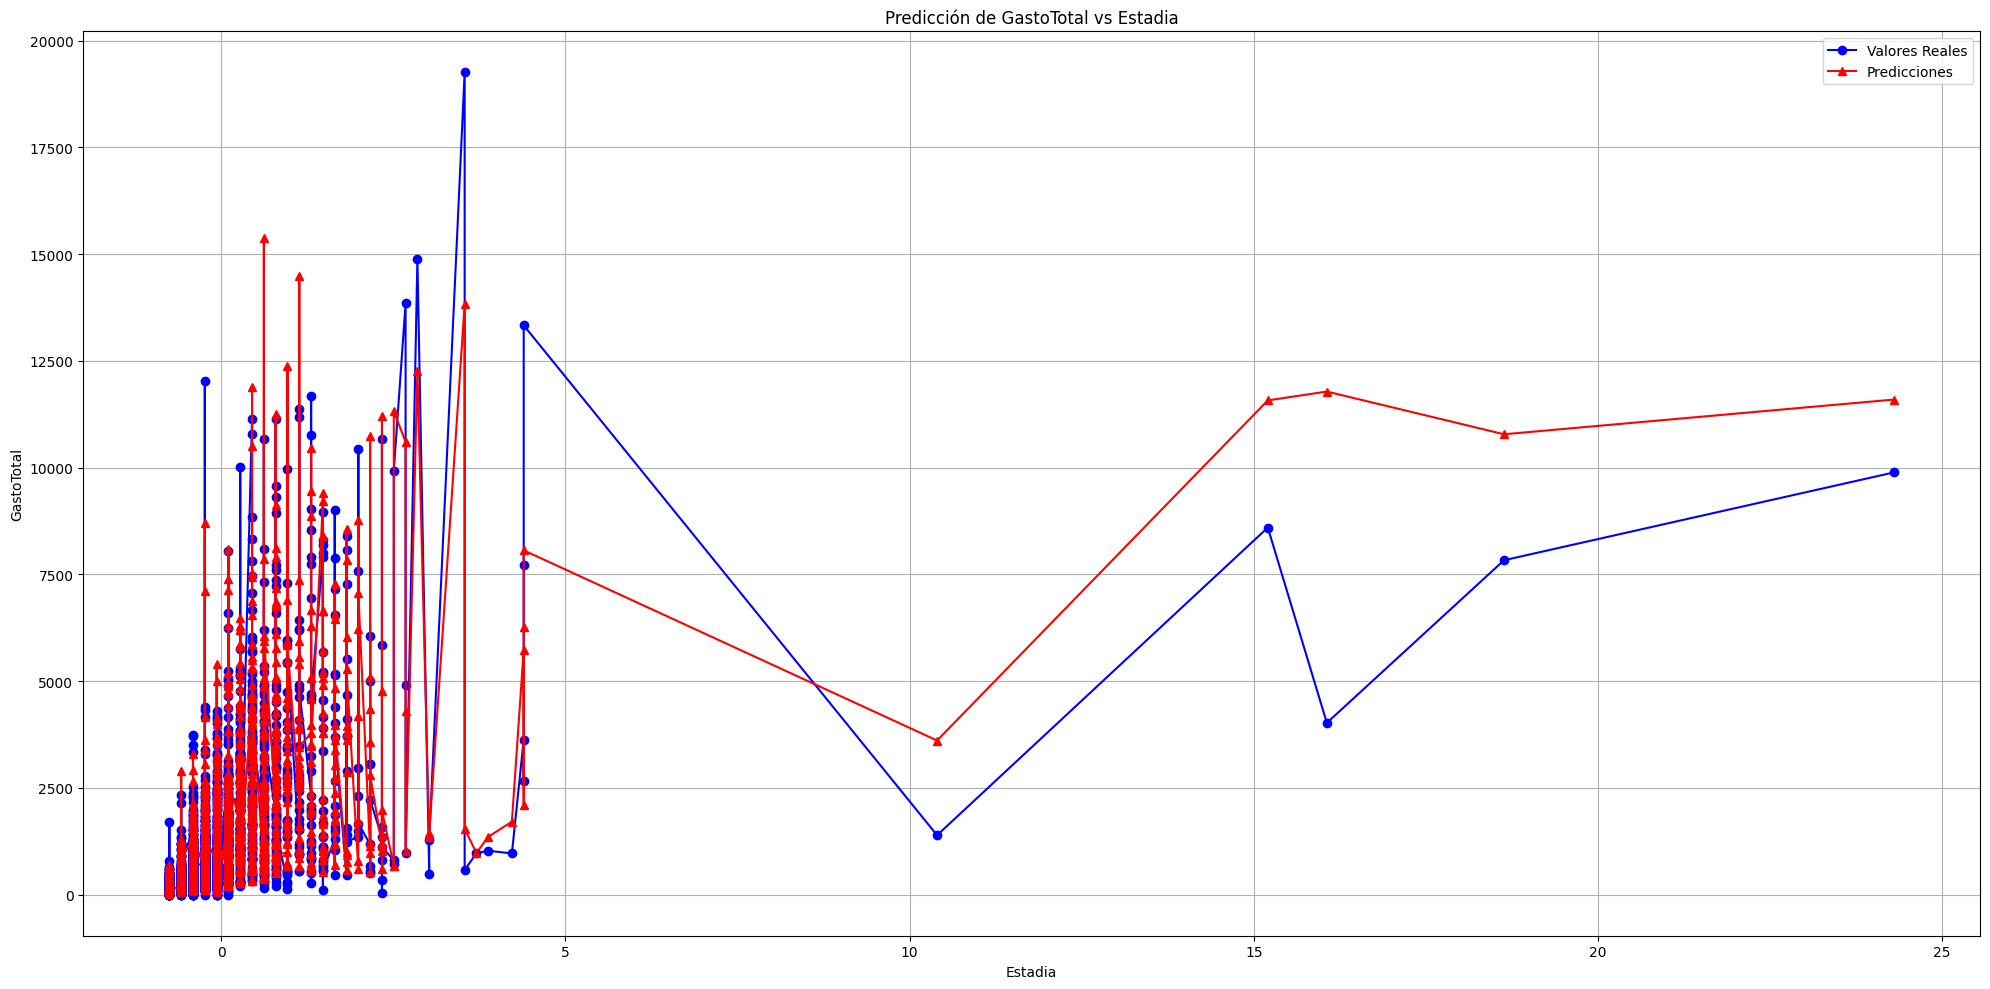

In [51]:
# Ordena los datos de prueba por Estadia para una mejor visualización
X_test_sorted = X_test.sort_values('Estadia')
y_test_sorted = y_test.loc[X_test_sorted.index]

# Obtiene predicciones del modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test_sorted)

# Grafica predicción de GastoTotal vs Estadia
plt.figure(figsize=(20, 10))
plt.plot(X_test_sorted['Estadia'], y_test_sorted, 'bo-', label='Valores Reales')
plt.plot(X_test_sorted['Estadia'], y_pred_test, 'r^-', label='Predicciones')
plt.xlabel('Estadia')
plt.ylabel('GastoTotal')
plt.title('Predicción de GastoTotal vs Estadia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Un grafico de scatter plot con los valores reales (y_test) con las predicciones del modelo. Cada punto en el gráfico representa un ejemplo individual del conjunto de prueba.

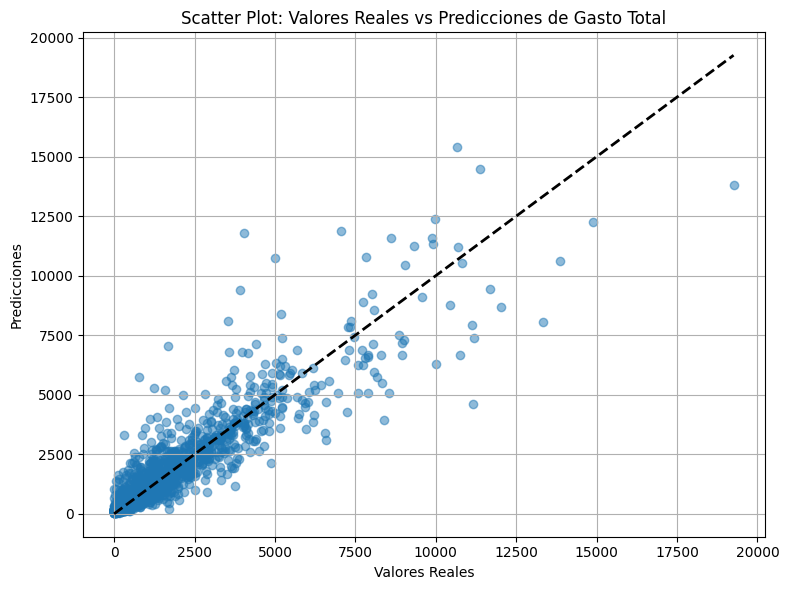

In [ ]:
import matplotlib.pyplot as plt

# Obtiene predicciones del modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# scatter plot de valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Scatter Plot: Valores Reales vs Predicciones de Gasto Total')
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

###Conclusiones
Desempeño del Modelo:

*   RMSE en conjunto de entrenamiento: 571.43
*   RMSE en conjunto de validación: 718.54
*   R² en conjunto de entrenamiento: 0.909
*   R² en conjunto de validación: 0.839

Un RMSE más bajo indica mejor ajuste. En este caso, el RMSE es razonablemente bajo, aunque es más alto en el conjunto de validación en comparación con el conjunto de entrenamiento. Los valores de RMSE y R² indican un desempeño consistente y confiable tanto en el conjunto de entrenamiento como en el de validación. El modelo Random Forest muestra un buen rendimiento, con un R² alto tanto en el conjunto de entrenamiento como en el de validación. Esto sugiere que el modelo es capaz de capturar las relaciones en los datos de manera efectiva.

La predicción del gasto total obtenida mediante el modelo proporciona una indicación útil del comportamiento esperado del turismo en Uruguay. Sin embargo, dado que el modelo es relativamente simple y se basa únicamente en variables numéricas y categóricas, no se puede considerar completamente determinante o exacto para la toma de decisiones estratégicas. Es crucial ajustar el modelo y tener en cuenta factores imprevistos, como eventos globales significativos (por ejemplo, la pandemia de coronavirus), que pueden impactar drásticamente el comportamiento del turismo.

A pesar de sus limitaciones, el modelo puede ser valioso para estudiar el comportamiento de segmentos específicos de turistas. Puede ayudar a orientar las campañas de marketing al público objetivo de manera más efectiva, por ejemplo, al enfocar las estrategias del turismo nacional hacia aquellos grupos con una alta incidencia en el gasto total, y personalizar las campañas para los segmentos de turistas que, según el historial, muestran una menor incidencia. Esto permitirá diseñar iniciativas más precisas y ajustadas a las características de los diferentes grupos de turistas, mejorando así la eficacia de las campañas de promoción turística.